<a href="https://colab.research.google.com/github/wooseok9872/Kotlin_FastCampus/blob/main/py3_CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST train, test dataset 가져오기

In [4]:
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



# 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


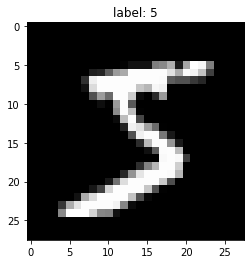

In [5]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0)
print("image data 형태:", image.size())
print("label: ", label)

# 그리기
img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


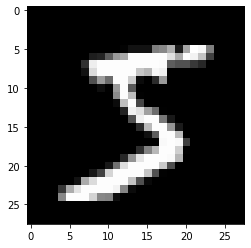

0


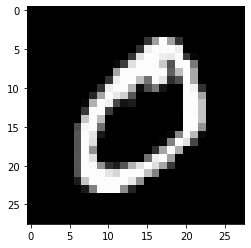

4


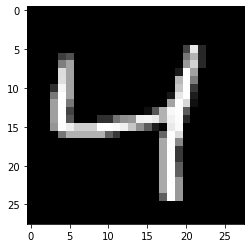

In [7]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img=mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()

# Convolution 하나 뜨워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


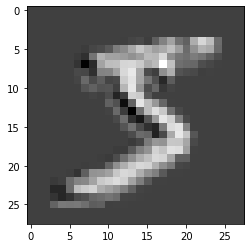

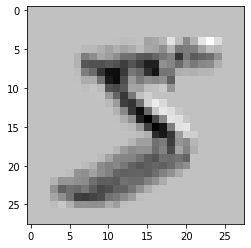

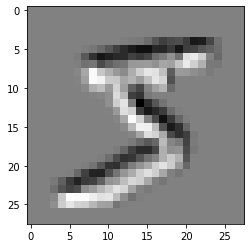

In [10]:
# mnistd의 첫번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
# view : tensor의 사이즈 조절, -1 : 해당 차원 확장시켜라
# [1, 28, 28] -> [1, 1, 28, 28]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

# convolution filter 정의
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
# image에 filter 적용
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
  plt.show()

# cnn 만들기
## train, test data 가져오기

In [11]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.00002
num_epoch = 10

train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

# CNN 클래스 만들기(모델 만들기)

In [18]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer=nn.Sequential(
        nn.Conv2d(1, 16, 5, padding=2),
        nn.ReLU(),

        nn.Conv2d(16, 32, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Conv2d(32, 64, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100,100)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

model = CNN().cuda()

In [19]:
for parameter in model.parameters():
  print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])


# loss function, optimizer 선언

In [20]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [29]:
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = Variable(image).cuda()
    y_ = Variable(label).cuda()

    optimizer.zero_grad()
    output=model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j%50==0:
      print(loss, j, i)

tensor(0.5064, device='cuda:0', grad_fn=<NllLossBackward0>) 0 0
tensor(0.7758, device='cuda:0', grad_fn=<NllLossBackward0>) 50 0
tensor(0.7163, device='cuda:0', grad_fn=<NllLossBackward0>) 0 1
tensor(0.6365, device='cuda:0', grad_fn=<NllLossBackward0>) 50 1
tensor(1.3526, device='cuda:0', grad_fn=<NllLossBackward0>) 0 2
tensor(0.7856, device='cuda:0', grad_fn=<NllLossBackward0>) 50 2
tensor(0.8383, device='cuda:0', grad_fn=<NllLossBackward0>) 0 3
tensor(0.7703, device='cuda:0', grad_fn=<NllLossBackward0>) 50 3
tensor(0.8997, device='cuda:0', grad_fn=<NllLossBackward0>) 0 4
tensor(1.2134, device='cuda:0', grad_fn=<NllLossBackward0>) 50 4
tensor(0.6186, device='cuda:0', grad_fn=<NllLossBackward0>) 0 5
tensor(0.2095, device='cuda:0', grad_fn=<NllLossBackward0>) 50 5
tensor(0.3992, device='cuda:0', grad_fn=<NllLossBackward0>) 0 6
tensor(0.5431, device='cuda:0', grad_fn=<NllLossBackward0>) 50 6
tensor(0.7164, device='cuda:0', grad_fn=<NllLossBackward0>) 0 7
tensor(0.8697, device='cuda:0', g

# 모델 저장하기

In [23]:
torch.save(model, './myscnn_model_%d.pkl'%(num_epoch))

In [24]:
try:
  model=torch.load('nets/mycnn_model_10.pkl')
  print("model restored")
except:
  print("model not restored")

model not restored


# 정확도 확인

In [27]:
# 정확도 함수 선언
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j, [imgs, labels] in enumerate(dloader):
    img = Variable(imgs).cuda()
    label = Variable(labels).cuda()

    output = imodel.forward(img)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == label).sum().float()
  print("Accurancy of Test Data: {}", format(100*correct/total))

In [30]:
ComputeAccr(test_loader, model)

Accurancy of Test Data: {} 82.18999481201172
